# Profitable App Profiles for the App Store and Google Play Markets

##### My aim is to understand what type of apps are likely to attract more users on Google Play and the App Store

## Exploring the data

Collecting data for over four million apps requires a significant amount of time and money, so I'll try to analyze a sample of data instead. 
- [This data set](https://www.kaggle.com/lava18/google-play-store-apps) contains data about approximately ten thousand Android apps from Google Play. The data set can be downloaded directly from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
- [This data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) contains data about approximately seven thousand iOS apps from the App Store. The data set can be downloaded directly from [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).


In [41]:
# Reading the Google Playstore dataset
from csv import reader
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
playstore = list(read_file)
playstore_header = playstore[0]
playstore_dataset = playstore[1:]

# print(playstore[:3])
# print(playstore_dataset[:3])

# Reading the App Store dataset
from csv import reader
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
appstore = list(read_file)
appstore_header = appstore[0]
appstore_dataset = appstore[1:]

# print(appstore[:3])
# print(appstore_dataset[:3])

## Creating a function to explore the datasets

In [42]:
# Creating a function to explore the datasets
def explore_data(dataset, start, end, rows_and_columns = False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n') # adds an empty line after each row 
        
    if rows_and_columns == True:
        print('Number of rows: ', len(dataset))
        print('Number of columns: ', len(dataset[0]))

## Exploring the Google Play Store data set

In [43]:
print(playstore_header)
print('\n')
explore_data(playstore_dataset, 0, 5, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Eve

## Exploring the App Store data set

In [44]:
print(appstore_header)
print('\n')
explore_data(appstore_dataset, 0, 5, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows:  7197
Number of columns:  16


## Data Cleaning / Deleting wrong data

##### Needed to do the following:
1.) Detect inaccurate data, and correct or remove it.
2.) Detect duplicate data, and remove the duplicates. 
Since build was only for free apps, needed to remove apps that are not free from the dataset. Also need to remove apps that are non-English. In row 10472 of playstore dataset, the "Category" column has missing data and because of this, a column shift to the left has occured for the subsequent columns.

In [45]:
print(playstore_dataset[10472])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In [46]:
# To check for empty string
for row in playstore_dataset:
    for element in row:
        if element == '':
            print(row)  

['Market Update Helper', 'LIBRARIES_AND_DEMO', '4.1', '20145', '11k', '1,000,000+', 'Free', '0', 'Everyone', 'Libraries & Demo', 'February 12, 2013', '', '1.5 and up']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In [47]:
print(playstore_dataset[10472]) # incorrect row
print("\n")
print(len(playstore_dataset))
del playstore_dataset[10472] # do not run this more than once
print(len(playstore_dataset)) # length after deleting the incorrect row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


10841
10840


In [48]:
print(playstore_dataset[10472])

['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']


## Removing Duplicate Entries

##### Some apps in the Google Playstore dataset have more than one entry. For instance, the application Instagram has four entries.

In [49]:
for row in playstore_dataset:
    app_name = row[0]
    if app_name == "Instagram":
        print(row)
print("\n")    

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']




In [50]:
# Counting the number of duplicate apps in Google Playstore
duplicate_entries = []
unique_entries = []

for row in playstore_dataset:
    app_name = row[0]
    if app_name in unique_entries:
        duplicate_entries.append(app_name)
    else:
        unique_entries.append(app_name)

print("Number of duplicate apps: ", len(duplicate_entries))       
print("\n")
print("Examples of duplicate apps: ", duplicate_entries[:10])
print("\n")  

Number of duplicate apps:  1181


Examples of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']




##### To not count the duplicate apps more than once, I need to keep just one app and remove the rest. 
For this, created a dictionary and considered each key as a unique app name and the corresponding value as the highest number of reviews of that app. To get the highest review for the same app, looked at the fourth position of each row. The different numbers in the "Reviews" column for the same app show that the data was collected at different times and the highest rating would mean that it was the latest data collected and is hence more reliable. This new dictionary 'reviews_max' created will have only one entry per app, each having the highest review.

In [51]:
reviews_max = {}

for row in playstore_dataset:
    app_name = row[0]
    n_reviews = float(row[3])
    
    if app_name in reviews_max and reviews_max[app_name] < n_reviews: # update dictionary to the latest/highest review for same app
        reviews_max[app_name] = n_reviews
    
    elif app_name not in reviews_max:
        reviews_max[app_name] = n_reviews
        

In [52]:
print(len(reviews_max))

9659


##### In a previous code cell, there are 1,181 cases where an app occurs more than once, so the length of our dictionary (of unique apps) should be equal to the difference between the length of our data set and 1,181.

In [53]:
print("Current length: ", len(playstore_dataset))
print("Expected length: ", len(playstore_dataset)- 1181)
print("Length of reviews_max dictionary: ", len(reviews_max))
print("\n")

Current length:  10840
Expected length:  9659
Length of reviews_max dictionary:  9659




##### Using the reviews_max dictionary to remove the duplicates. Keeping only the entries with the highest number of reviews for the duplicate app_name cases. In the code cell below:

Started by initializing two empty lists, android_clean and already_added. Looped through the playstore data set, and for every iteration. I isolated the name of the app and the number of reviews.

Added the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
The name of the app is not already in the already_added list. Needed to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If I just check for reviews_max[name] == n_reviews, I'll still end up with duplicate entries for some apps.

In [54]:
android_clean = []
already_added = []

for row in playstore_dataset:
    app_name = row[0]
    n_reviews = float(row[3])
    
    if n_reviews == reviews_max[app_name] and app_name not in already_added:
        android_clean.append(row)
        already_added.append(app_name)


In [55]:
print(len(android_clean))
print(len(already_added))

9659
9659


In [56]:
# Counting the number of duplicate apps in App Playstore
duplicate_entries = []
unique_entries = []

for row in appstore_dataset:
    app_id = row[0]
    if app_id in unique_entries:
        duplicate_entries.append(app_id)
    else:
        unique_entries.append(app_id)

print("Number of duplicate apps: ", len(duplicate_entries))       
print("\n")
print("Examples of duplicate apps: ", duplicate_entries[:10])
print("\n")

Number of duplicate apps:  0


Examples of duplicate apps:  []




## Removing Non-English Apps

##### Some apps in the Google Playstore dataset and App Store dataset contain the names of some of the apps that are not directed towards an English-speaking audience. Below are a couple of examples from both data sets:

In [57]:
print(appstore_dataset[813][1])
print(appstore_dataset[813][1])
print("\n")
print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
爱奇艺PPS -《欢乐颂2》电视剧热播


中国語 AQリスニング
لعبة تقدر تربح DZ


##### Removed these kind of apps.
One way to go about this was to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and one can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.Hence, built this function below, to use the built-in ord() function to find out the corresponding encoding number of each character.

However, some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, the function in its current form removed useful apps. 

In [58]:
def english_check(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True

print(english_check('Instagram'))
print(english_check('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english_check('Docs To Go™ Free Office Suite'))
print(english_check('Instachat 😜'))
print("\n")
print(ord('™'))
print(ord('😜'))
            

True
False
False
False


8482
128540


##### Modified function to minimize the impact of data loss
Removed an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. This means all English apps with up to three emoji or other special characters will still be labeled as English. The modified filter function is still not perfect, but it should be fairly effective.

In [59]:
def english_check_modified(string):
    count = 0
    for character in string:
        if ord(character) > 127:
            count += 1
            
    if count > 3:
        return False
    
    return True

print(english_check_modified('Instagram'))
print(english_check_modified('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english_check_modified('Docs To Go™ Free Office Suite'))
print(english_check_modified('Instachat 😜'))
print("\n")

True
False
True
True




In [60]:
#Using the new function to filter out non-English apps from both datasets

# for Google Play Store:
android_english = []

for row in android_clean:
    app_name = row[0]
    if english_check_modified(app_name):
        android_english.append(row) 

# for App Store:  
ios_english = []

for row in appstore_dataset:
    app_name = row[1]
    if english_check_modified(app_name):
        ios_english.append(row) 
        

In [61]:
# Checking for the number of rows and columns remaining for each dataset
explore_data(android_english, 0, 3, True)
print("\n")
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9614
Number of columns:  13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+'

##### We can see that we are left with 9614 Android apps and 6183 iOS apps.

## Isolating the Free Apps

##### So far in the data cleaning process, the following was done:
1.) Removed inaccurate data
2.) Removed duplicate app entries
3.) Removed non-English apps

Both the datasets contain both free and non-free apps; hence needed to isolate only the free apps for our analysis. Isolating the free apps will be the last step in the data cleaning process.

In [62]:
# Checking the price types for Google Play Store
price_type_playstore = {}

for row in android_english:
    price_type = row[6]
    if price_type in price_type_playstore:
        price_type_playstore[price_type] += 1
    else:
        price_type_playstore[price_type] = 1
        
print("Price types of Google Play Store:")
print(price_type_playstore)        
print("\n")


# Checking the price types for App Store
price_type_appstore = {}

for row in ios_english:
    price_type = row[4]
    if price_type in price_type_playstore:
        price_type_appstore[price_type] += 1
    else:
        price_type_appstore[price_type] = 1
        
print("Price types of App Store:")
print(price_type_appstore)        
print("\n")


Price types of Google Play Store:
{'Free': 8863, 'Paid': 750, 'NaN': 1}


Price types of App Store:
{'0.0': 1, '1.99': 1, '0.99': 1, '6.99': 1, '2.99': 1, '7.99': 1, '4.99': 1, '9.99': 1, '3.99': 1, '8.99': 1, '5.99': 1, '14.99': 1, '13.99': 1, '19.99': 1, '17.99': 1, '15.99': 1, '24.99': 1, '20.99': 1, '29.99': 1, '12.99': 1, '39.99': 1, '74.99': 1, '16.99': 1, '249.99': 1, '11.99': 1, '27.99': 1, '49.99': 1, '59.99': 1, '22.99': 1, '18.99': 1, '99.99': 1, '21.99': 1, '34.99': 1, '299.99': 1}




In [63]:
# Selecting only the free apps from Google Play Store

android_free_english = []
for row in android_english:
    if row[7] == "0":
        android_free_english.append(row)
        
print("Final length of android apps dataset: ", len(android_free_english))


# Selecting only the free apps from App Store
ios_free_english = []
for row in ios_english:
    if row[4] == "0.0":
        ios_free_english.append(row)
        
print("Final length of ios apps dataset: ", len(ios_free_english))



Final length of android apps dataset:  8864
Final length of ios apps dataset:  3222


##### We can see that we are finally left with 8864 Android apps and 3222 iOS apps.

##### A good amount of time cleaning data, included the following:

1.) Removing inaccurate data 
2.) Removing duplicate app entries
3.) Removing non-English apps
4.) Isolating the free apps

## Most Common Apps by Genre

##### Built two functions we can use to analyze the frequency tables:

1.) One function to generate frequency tables that show percentages
2.) Another function to display the percentages in a descending order

In [64]:
# Function to generate frequency tables that show percentages
def frequency_table(dataset, index):
    
    table = {}
    total_count = 0
    
    for row in dataset:
        total_count += 1
        key = row[index]
        if key in table:
            table[key] += 1
        else:
            table[key] = 1
                   
    table_percentages = {}
    for key in table:
        percentage = (table[key]/total_count) * 100
        table_percentages[key] = round(percentage,3)
     
    return table_percentages

print("Frequency Table of android apps dataset:")
print(frequency_table(android_free_english, 1))
print("\n")
print("Frequency Table of ios apps dataset:")
print(frequency_table(ios_free_english, 11))

Frequency Table of android apps dataset:
{'ART_AND_DESIGN': 0.643, 'AUTO_AND_VEHICLES': 0.925, 'BEAUTY': 0.598, 'BOOKS_AND_REFERENCE': 2.144, 'BUSINESS': 4.592, 'COMICS': 0.62, 'COMMUNICATION': 3.238, 'DATING': 1.861, 'EDUCATION': 1.162, 'ENTERTAINMENT': 0.959, 'EVENTS': 0.711, 'FINANCE': 3.7, 'FOOD_AND_DRINK': 1.241, 'HEALTH_AND_FITNESS': 3.08, 'HOUSE_AND_HOME': 0.824, 'LIBRARIES_AND_DEMO': 0.936, 'LIFESTYLE': 3.903, 'GAME': 9.725, 'FAMILY': 18.908, 'MEDICAL': 3.531, 'SOCIAL': 2.662, 'SHOPPING': 2.245, 'PHOTOGRAPHY': 2.944, 'SPORTS': 3.396, 'TRAVEL_AND_LOCAL': 2.335, 'TOOLS': 8.461, 'PERSONALIZATION': 3.317, 'PRODUCTIVITY': 3.892, 'PARENTING': 0.654, 'WEATHER': 0.801, 'VIDEO_PLAYERS': 1.794, 'NEWS_AND_MAGAZINES': 2.798, 'MAPS_AND_NAVIGATION': 1.399}


Frequency Table of ios apps dataset:
{'Social Networking': 3.29, 'Photo & Video': 4.966, 'Games': 58.163, 'Music': 2.048, 'Reference': 0.559, 'Health & Fitness': 2.017, 'Weather': 0.869, 'Utilities': 2.514, 'Travel': 1.241, 'Shopping': 2

In [78]:
# Another function to display the percentages in a descending order

import matplotlib.pyplot as plt
category_bar = []
genre_percentage = []


def display_table(dataset, index):
    table = frequency_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        
        
        
# function to display the table visually        
def plot_table_common(dataset, index, top_n):
    table = frequency_table(dataset, index)
    category = sorted(table, key = table.get, reverse=True)[:top_n]
    values = [table[key] for key in category]
    
    category.reverse()
    values.reverse()   

    # creating the bar plot    
    plt.barh(category, values)
    plt.ylabel("Category / prime_genre")
    plt.xlabel("Percentage of apps based on genre")
    plt.title("Most Common Apps by Genre")
    plt.show()
    
    
    

## Examining the frequency table for the prime_genre column of the App Store data set

In [79]:
display_table(ios_free_english, 11) 


Games : 58.163
Entertainment : 7.883
Photo & Video : 4.966
Education : 3.662
Social Networking : 3.29
Shopping : 2.607
Utilities : 2.514
Sports : 2.142
Music : 2.048
Health & Fitness : 2.017
Productivity : 1.738
Lifestyle : 1.583
News : 1.335
Travel : 1.241
Finance : 1.117
Weather : 0.869
Food & Drink : 0.807
Reference : 0.559
Business : 0.528
Book : 0.435
Navigation : 0.186
Medical : 0.186
Catalogs : 0.124


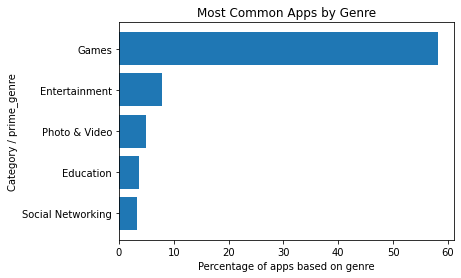

In [80]:
plot_table_common(ios_free_english, 11, 5) #to display the top 5

It can be seen that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in the data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

## Examining the frequency table for the Category column of the Google Play data set

In [81]:
display_table(android_free_english, 1)

FAMILY : 18.908
GAME : 9.725
TOOLS : 8.461
BUSINESS : 4.592
LIFESTYLE : 3.903
PRODUCTIVITY : 3.892
FINANCE : 3.7
MEDICAL : 3.531
SPORTS : 3.396
PERSONALIZATION : 3.317
COMMUNICATION : 3.238
HEALTH_AND_FITNESS : 3.08
PHOTOGRAPHY : 2.944
NEWS_AND_MAGAZINES : 2.798
SOCIAL : 2.662
TRAVEL_AND_LOCAL : 2.335
SHOPPING : 2.245
BOOKS_AND_REFERENCE : 2.144
DATING : 1.861
VIDEO_PLAYERS : 1.794
MAPS_AND_NAVIGATION : 1.399
FOOD_AND_DRINK : 1.241
EDUCATION : 1.162
ENTERTAINMENT : 0.959
LIBRARIES_AND_DEMO : 0.936
AUTO_AND_VEHICLES : 0.925
HOUSE_AND_HOME : 0.824
WEATHER : 0.801
EVENTS : 0.711
PARENTING : 0.654
ART_AND_DESIGN : 0.643
COMICS : 0.62
BEAUTY : 0.598


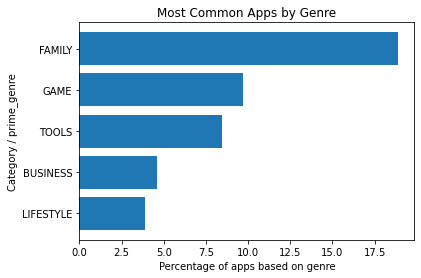

In [87]:
plot_table(android_free_english, 1, 5)

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids(shown in the image below).

![](GooglePlayStoreApps_Family.png)

Practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table seen for the Genres column:

In [83]:
display_table(android_free_english, -4)

Tools : 8.45
Entertainment : 6.069
Education : 5.347
Business : 4.592
Productivity : 3.892
Lifestyle : 3.892
Finance : 3.7
Medical : 3.531
Sports : 3.463
Personalization : 3.317
Communication : 3.238
Action : 3.102
Health & Fitness : 3.08
Photography : 2.944
News & Magazines : 2.798
Social : 2.662
Travel & Local : 2.324
Shopping : 2.245
Books & Reference : 2.144
Simulation : 2.042
Dating : 1.861
Arcade : 1.85
Video Players & Editors : 1.771
Casual : 1.76
Maps & Navigation : 1.399
Food & Drink : 1.241
Puzzle : 1.128
Racing : 0.993
Role Playing : 0.936
Libraries & Demo : 0.936
Auto & Vehicles : 0.925
Strategy : 0.914
House & Home : 0.824
Weather : 0.801
Events : 0.711
Adventure : 0.677
Comics : 0.609
Beauty : 0.598
Art & Design : 0.598
Parenting : 0.496
Card : 0.451
Casino : 0.429
Trivia : 0.417
Educational;Education : 0.395
Board : 0.384
Educational : 0.372
Education;Education : 0.338
Word : 0.259
Casual;Pretend Play : 0.237
Music : 0.203
Racing;Action & Adventure : 0.169
Puzzle;Brain G

The difference between the Genres and the Category columns is not crystal clear, but one thing that can be noticed is that the Genres column is much more granular (it has more categories). Since I am only looking for the bigger picture at the moment, I will only work with the Category column of the Google Play Store dataset moving forward.

Up to this point, I found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now, I'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, this information is in the Installs column, but for the App Store data set this information is missing. As a workaround, I'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Below, I calculate the average number of user ratings per app genre on the App Store:

In [88]:
genre_ios = frequency_table(ios_free_english, 11) #dictionary

for genre in genre_ios:
    total = 0
    len_genre = 0
    for row in ios_free_english:
        genre_app = row[11]
        if genre_app == genre:
            ratings_count = float(row[5])
            total += ratings_count
            len_genre += 1
     
    avg_ratings = round((total/len_genre), 3)
    print(genre,':', avg_ratings)
        

Social Networking : 71548.349
Photo & Video : 28441.544
Games : 22788.67
Music : 57326.53
Reference : 74942.111
Health & Fitness : 23298.015
Weather : 52279.893
Utilities : 18684.457
Travel : 28243.8
Shopping : 26919.69
News : 21248.023
Navigation : 86090.333
Lifestyle : 16485.765
Entertainment : 14029.831
Food & Drink : 33333.923
Sports : 23008.899
Book : 39758.5
Finance : 31467.944
Education : 7003.983
Productivity : 21028.411
Business : 7491.118
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together.

The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

My aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. 

In [89]:
#printing the name and number of ratings for 'Navigation' as a genre
for row in ios_free_english:
    if row[11] == 'Navigation':
        print(row[1], ':' ,row[5])
print("\n")        

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5




In [90]:
#printing the name and number of ratings for 'Reference' as a genre
for row in ios_free_english:
    if row[11] == 'Reference':
        print(row[1], ':' ,row[5])
print("\n")         

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0




Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating.

However, this niche seems to show some potential. One thing that can be done is take another popular book and turn it into an app where one could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.
This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea described above, but the other genres don't seem too interesting to us:

Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope.

Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge.


![](AppStore_Books.png)

## Most Popular Apps by Genre on Google Play Store

For the Google Play market, there actually is data about the number of installs, so I should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough as most values are open-ended (100+, 1,000+, 5,000+, etc.)

In [91]:
display_table(android_free_english, 5) #installs column

1,000,000+ : 15.727
100,000+ : 11.552
10,000,000+ : 10.548
10,000+ : 10.199
1,000+ : 8.394
100+ : 6.916
5,000,000+ : 6.825
500,000+ : 5.562
50,000+ : 4.772
5,000+ : 4.513
10+ : 3.542
500+ : 3.249
50,000,000+ : 2.301
100,000,000+ : 2.132
50+ : 1.918
5+ : 0.79
1+ : 0.508
500,000,000+ : 0.271
1,000,000,000+ : 0.226
0+ : 0.045
0 : 0.011


One problem with this data is that is not precise. For instance,I don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, as very precise data is not needed for my purpose — I only want to get an idea which app genres attract the most users, and I don't need perfect precision with respect to the number of users.

Going to leave the numbers as they are, which means that I'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, I have to convert each install number to float — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. This can be done directly in the loop below, where I also compute the average number of installs for each genre (category).

In [92]:
categories_android = frequency_table(android_free_english, 1) #dictionary

for category in categories_android:
    total = 0
    len_category = 0
    for row in android_free_english:
        category_app = row[1]
        if category_app == category:
            n_installs = row[5]
            n_installs = n_installs.replace('+','')
            n_installs = n_installs.replace(',','')
            total += float(n_installs)
            len_category += 1
     
    avg_n_installs = round((total/len_category), 3)
    print(category,':', avg_n_installs)

ART_AND_DESIGN : 1986335.088
AUTO_AND_VEHICLES : 647317.817
BEAUTY : 513151.887
BOOKS_AND_REFERENCE : 8767811.895
BUSINESS : 1712290.147
COMICS : 817657.273
COMMUNICATION : 38456119.167
DATING : 854028.83
EDUCATION : 1833495.146
ENTERTAINMENT : 11640705.882
EVENTS : 253542.222
FINANCE : 1387692.476
FOOD_AND_DRINK : 1924897.736
HEALTH_AND_FITNESS : 4188821.985
HOUSE_AND_HOME : 1331540.562
LIBRARIES_AND_DEMO : 638503.735
LIFESTYLE : 1437816.269
GAME : 15588015.603
FAMILY : 3695641.82
MEDICAL : 120550.62
SOCIAL : 23253652.127
SHOPPING : 7036877.312
PHOTOGRAPHY : 17840110.402
SPORTS : 3638640.143
TRAVEL_AND_LOCAL : 13984077.71
TOOLS : 10801391.299
PERSONALIZATION : 5201482.612
PRODUCTIVITY : 16787331.345
PARENTING : 542603.621
WEATHER : 5074486.197
VIDEO_PLAYERS : 24727872.453
NEWS_AND_MAGAZINES : 9549178.468
MAPS_AND_NAVIGATION : 4056941.774


On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs.

In [93]:
for row in android_free_english:
    if row[1] == 'COMMUNICATION' and (row[5] == '1,000,000,000+'
                                      or row[5] == '500,000,000+'
                                      or row[5] == '100,000,000+'):
        print(row[0], ':', row[5])
print("\n")        

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

In [94]:
under_100_M = []

for row in android_free_english:
    n_installs = row[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (row[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_M.append(float(n_installs)) 
sum(under_100_M) / len(under_100_M)

3603485.3884615386

If I removed all the communication apps that have over 100 million installs, the average would be reduced by roughly ten times as seen above.

The same pattern is seen for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously found out that this part of the market seems a bit saturated, so I'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since I found this genre has some potential to work well on the App Store, and my aim is to understand an app genre that shows potential for being profitable on both the App Store and Google Play.



In [95]:
for row in android_free_english:
    if row[1] == 'BOOKS_AND_REFERENCE':
        print(row[0], ':', row[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

In [96]:
for row in android_free_english:
    if row[1] == 'BOOKS_AND_REFERENCE' and (row[5] == '1,000,000,000+'
                                        or row[5] == '500,000,000+'
                                        or row[5] == '100,000,000+'):
        print(row[0], ':', row[5])
print("\n")   
   

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+




However, it looks like there are only a few very popular apps, so this market still shows potential. Trying to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [97]:
for row in android_free_english:
    if row[1] == 'BOOKS_AND_REFERENCE' and (row[5] == '1,000,000+'
                                        or row[5] == '5,000,000+'
                                        or row[5] == '10,000,000+'
                                        or row[5] == '50,000,000+'):
        print(row[0], ':', row[5])
print("\n")  

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

I also noticed there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, some additions can be made by introducing some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

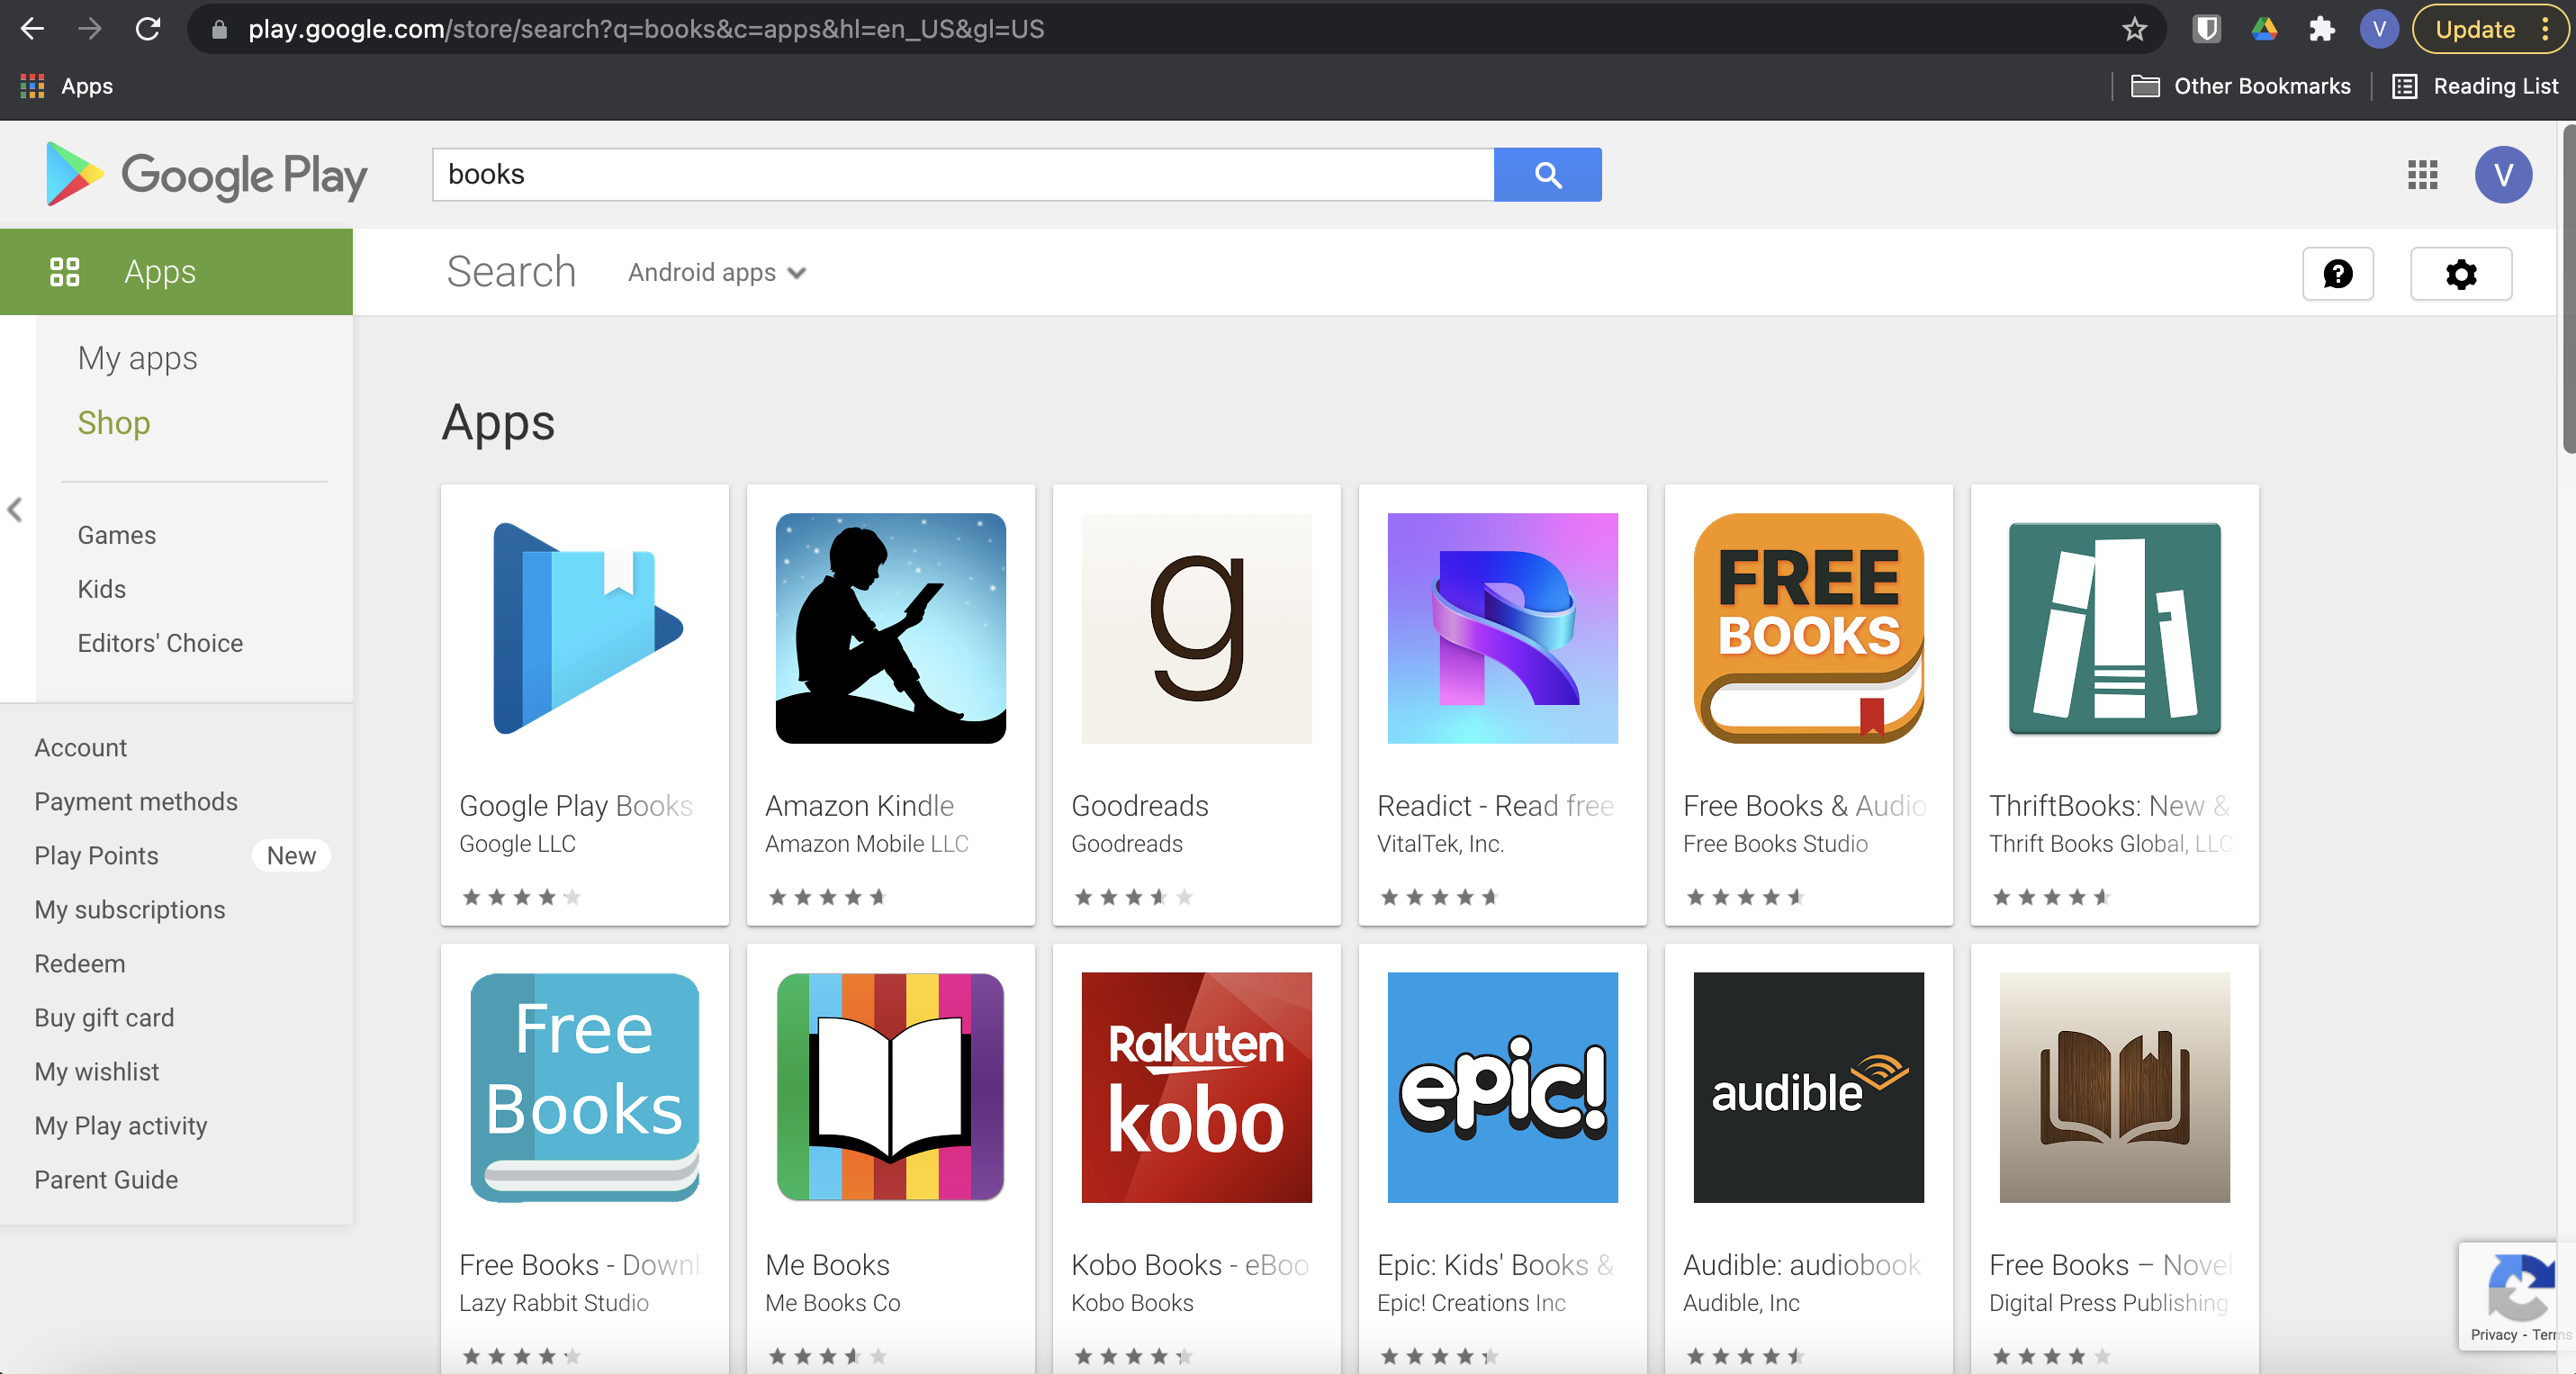

In [106]:
from IPython.display import Image
Image(filename = "GooglePlayStore_Books.png", width = 8000, height = 800)

## Conclusions

In this project, I analyzed data about the App Store and Google Play mobile apps with the goal of understanding an app profile that can be profitable for both markets.

I conclude that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so one could add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

I also suggest that apps overlapping multiple genres such as comic books + games to form an interactive graphic novel can create new niches that can provide competitive advantage and high profitability.